In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Dense, Flatten, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline 
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving data.zip to data.zip


In [ ]:
!unzip data.zip
!rm data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/without/01002_Mask_Mouth_Chin.jpg  
  inflating: data/without/01003_Mask_Mouth_Chin.jpg  
  inflating: data/without/01004_Mask_Mouth_Chin.jpg  
  inflating: data/without/01005_Mask_Mouth_Chin.jpg  
  inflating: data/without/01006_Mask_Mouth_Chin.jpg  
  inflating: data/without/01007_Mask_Mouth_Chin.jpg  
  inflating: data/without/01008_Mask_Mouth_Chin.jpg  
  inflating: data/without/01009_Mask_Mouth_Chin.jpg  
  inflating: data/without/01010_Mask_Mouth_Chin.jpg  
  inflating: data/without/01011_Mask_Mouth_Chin.jpg  
  inflating: data/without/01012_Mask_Mouth_Chin.jpg  
  inflating: data/without/01013_Mask_Mouth_Chin.jpg  
  inflating: data/without/01014_Mask_Mouth_Chin.jpg  
  inflating: data/without/01015_Mask_Chin.jpg  
  inflating: data/without/01016_Mask_Mouth_Chin.jpg  
  inflating: data/without/01017_Mask_Mouth_Chin.jpg  
  inflating: data/without/01018_Mask_Mouth_Chin.jpg  
  inflating: data/without/01019_Mask_

In [ ]:
batch_size = 8
epoch = 30

In [ ]:
direct = 'data'

img_datagen = ImageDataGenerator(validation_split=0.2, 
                                 rescale = 1./255, 
                                 rotation_range=40, 
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip = True,
                                 fill_mode='nearest')

train_generator = img_datagen.flow_from_directory(direct, 
                                                  target_size=(70,70),
                                                  batch_size= batch_size,
                                                  color_mode = 'rgb',
                                                  class_mode = 'binary', 
                                                  shuffle=True,
                                                  seed=42,
                                                  subset = 'training'
                                                  )

validation_generator = img_datagen.flow_from_directory(direct,
                                                       target_size=(70,70),
                                                       batch_size=batch_size,
                                                       color_mode = 'rgb',
                                                       class_mode= 'binary',
                                                       subset = 'validation')

Found 8011 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train_generator)

In [ ]:
def plot_img(images_arr):
  fig, ax = plt.subplots(1, batch_size, figsize=(20,20))
  ax = ax.flatten()
  for img, ax in zip(images_arr, ax):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

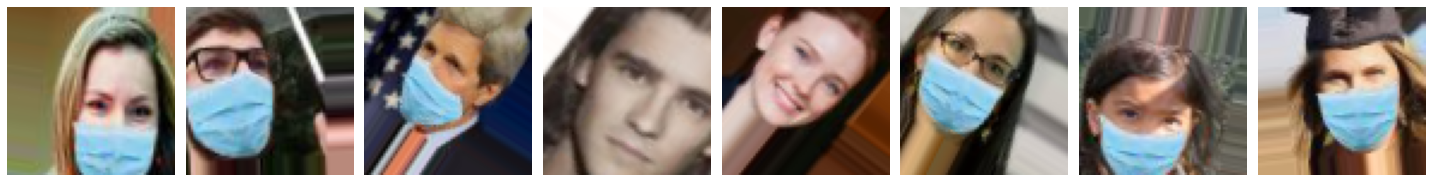

[0. 0. 0. 1. 1. 0. 0. 0.]


In [ ]:
plot_img(imgs)
print(labels)

In [ ]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    #means the output is 0,1 (the labels) and the P(c=0) +P(c=1) = 1 
                    Dense(units=1, activation='sigmoid'), 

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs = epoch, validation_data = validation_generator)

Epoch 1/30
1002/1002 [==============================] - 73s 72ms/step - loss: 0.5078 - accuracy: 0.7540 - val_loss: 0.4844 - val_accuracy: 0.7737
Epoch 2/30
1002/1002 [==============================] - 73s 73ms/step - loss: 0.2785 - accuracy: 0.8837 - val_loss: 0.3747 - val_accuracy: 0.8412
Epoch 3/30
1002/1002 [==============================] - 70s 70ms/step - loss: 0.2155 - accuracy: 0.9100 - val_loss: 0.3023 - val_accuracy: 0.8806
Epoch 4/30
1002/1002 [==============================] - 70s 70ms/step - loss: 0.2004 - accuracy: 0.9231 - val_loss: 0.2436 - val_accuracy: 0.9041
Epoch 5/30
1002/1002 [==============================] - 73s 73ms/step - loss: 0.1895 - accuracy: 0.9333 - val_loss: 0.2046 - val_accuracy: 0.9226
Epoch 6/30
1002/1002 [==============================] - 73s 73ms/step - loss: 0.1630 - accuracy: 0.9400 - val_loss: 0.2086 - val_accuracy: 0.9231
Epoch 7/30
1002/1002 [==============================] - 73s 73ms/step - loss: 0.1636 - accuracy: 0.9397 - val_loss: 0.1827 -

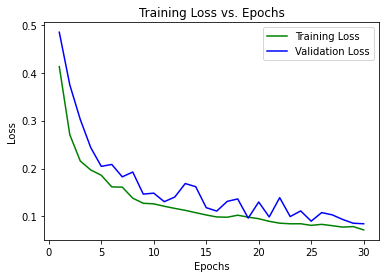

In [ ]:
loss_training = history.history['loss']
loss_validation = history.history['val_loss']
epoch_plot = range(1, epoch + 1)
plt.plot(epoch_plot, loss_training, 'g', label = 'Training Loss')
plt.plot(epoch_plot, loss_validation, 'b', label = 'Validation Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

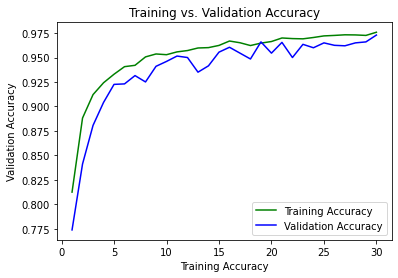

In [ ]:
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
plt.plot(epoch_plot, training_acc, 'g', label ='Training Accuracy')
plt.plot(epoch_plot, validation_acc, 'b', label = 'Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Training Accuracy')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from vis.utils import utils
import pydot
from keras.utils.vis_utils import plot_model

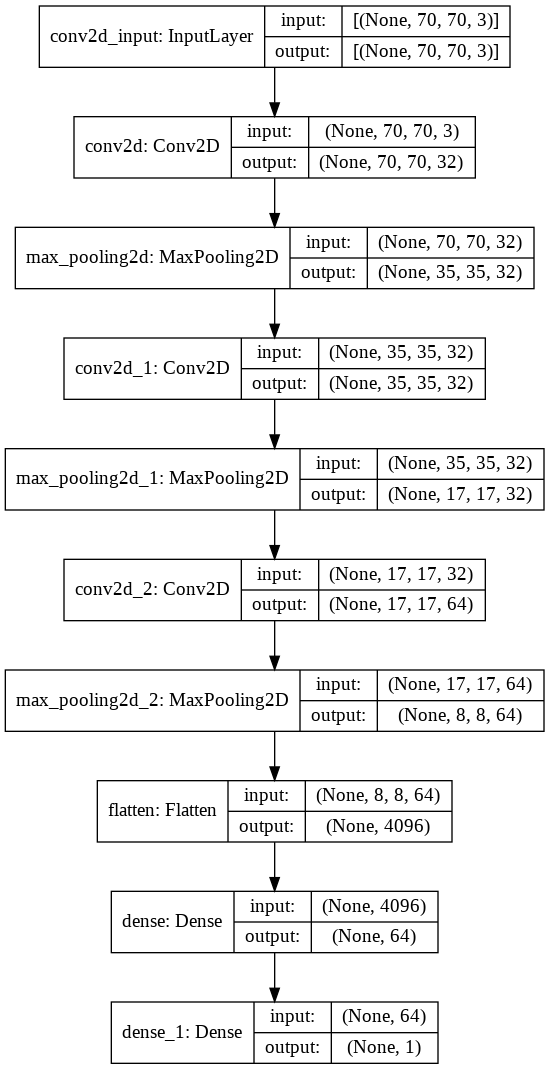

In [ ]:
plot_model(model, to_file='model_cnn.png', show_shapes=True, show_layer_names=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Top Layer Performance')

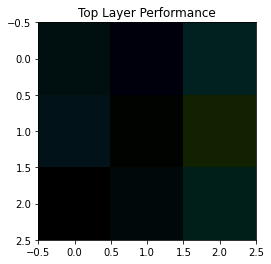

In [ ]:
top_layer = model.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='inferno')
plt.title('Top Layer Performance')